In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

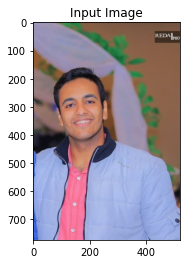

In [7]:

image = cv2.imread('D:\Me.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Input Image')
cv2.imwrite('input_image.jpg', image)

plt.show()

<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-8-8a4e3054f234>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


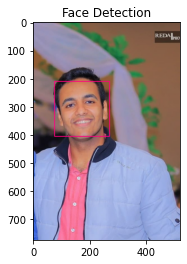

In [8]:

face_classifier = cv2.CascadeClassifier(r'D:\CV/haarcascade_frontalface_default.xml')


faces = face_classifier.detectMultiScale(gray, 1.3, 5)

if faces is ():
    print("No faces found")

for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Face Detection')
    cv2.imwrite('face_detection.jpg', image); plt.show()

In [9]:
eye_classifier = cv2.CascadeClassifier(r'D:\CV/haarcascade_eye.xml')
face_classifier = cv2.CascadeClassifier(r'D:\CV/haarcascade_frontalface_default.xml')

<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-10-9cb708bf1b89>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


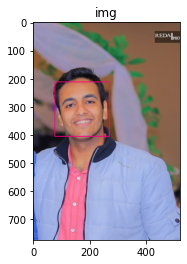

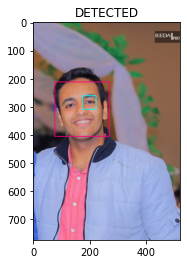

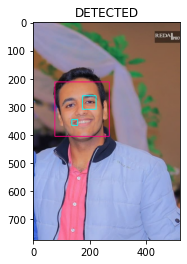

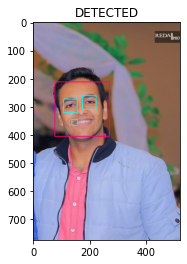

In [10]:
img = cv2.imread('D:\Me.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)


if faces is ():
    print("No Face Found")

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
    
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('img'); plt.show()
    cv2.imwrite('img.jpg', image)
    
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('DETECTED'); plt.show()
        cv2.imwrite('img_v2.jpg', img)

In [1]:
import numpy as np
import cv2
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+ 'haarcascade_eye_tree_eyeglasses.xml')
cap = cv2.VideoCapture(0)
ret,img = cap.read()

while(ret):
    ret,img = cap.read()
    #Converting the recorded image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #Applying filter to remove impurities
    gray = cv2.bilateralFilter(gray,5,1,1)
 
    #Detecting the face for region of image to be fed to eye classifier
    faces = face_cascade.detectMultiScale(gray, 1.3, 5,minSize=(200,200))
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

    cv2.imshow('img',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

